# Example use case
In this example use case we can observe a basic dataset analysis. The dataset of choice is about candy. The variable *winpercent* is the overall win percentage. The data is computed from over 269,000 matchups. That is giving someone two options of candy and he or she has to choose, so basically a popularity measure. For our analysis, we will make use of several Python packages which will be centrally imported here.

In [28]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import os
import collections
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import statsmodels.api as sm

## Import data
First of all, we import our data. We use an online source which is my GitHub, however, the data is not my own (which is properly documented in the README).

In [29]:
data_url = "https://raw.githubusercontent.com/miosga2309/candy_usecase/master/candy-data.csv"
df = pd.read_csv(data_url)

Let's see how the data looks like.

In [30]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


This seems to be a good opportunity to describe our variables.

### Variable descriptions
#### Explanatory variables
- **competitorname**: name of the candy brand (string)
- **chocolate**: indicates if the candy contains chocolate (binary)
- **fruity**: indicates if the candy is fruity (binary)
- **caramel**: indicates if the candy contains caramel (binary)
- **peanutyalmondy**: indicates if the candy contains nuts (binary)
- **nougat**: indicates if the candy contains nougat (binary)
- **crispedricewafer**: indicates if the candy is crispy (binary)
- **hard**: indicates if the candy is hard opposed to soft (binary)
- **bar**: indicates if the candy comes in the form of a bar (binary)
- **pluribus**: indicates if the candy comes in the form of multiples, e.g. gummy bears (binary)
- **sugarpercent**: indicates in which percentage -in reference to all other candies- the candy is with regard to sugar content (numeric)
- **pricepercent**: indicates in which percentage -in reference to all other candies- the candy is with regard to pricing (numeric)

#### Target variable
- **winpercent**: indicates in which percentage -in reference to all other candies- the candy is with regard to preference by the participants of the experiment (numeric)

We can use the pandas function `describe` to get an overview of our variables. Note that we only get numeric summaries of our binary variables which isn't very helpful.

In [31]:
df.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


A better way to get a first glimpse on our variables are tables or plots. At this point, we are already starting with our exploratory data analysis where we inspect our data free of expectations and assumptions.

## Exploratory data analysis
### Distributions per feature
First, we try tables for our binary variables. We can either use the built-in functions of `pandas` or ...

In [32]:
print(df.chocolate.value_counts())
print(df.fruity.value_counts())
print(df.caramel.value_counts())
print(df.peanutyalmondy.value_counts())
print(df.nougat.value_counts())
print(df.crispedricewafer.value_counts())
print(df.hard.value_counts())
print(df.bar.value_counts())
print(df.pluribus.value_counts())

0    48
1    37
Name: chocolate, dtype: int64
0    47
1    38
Name: fruity, dtype: int64
0    71
1    14
Name: caramel, dtype: int64
0    71
1    14
Name: peanutyalmondy, dtype: int64
0    78
1     7
Name: nougat, dtype: int64
0    78
1     7
Name: crispedricewafer, dtype: int64
0    70
1    15
Name: hard, dtype: int64
0    64
1    21
Name: bar, dtype: int64
1    44
0    41
Name: pluribus, dtype: int64


... or we use `counter` from *collections* or ...

In [33]:
dict(collections.Counter(df.peanutyalmondy))

{0: 71, 1: 14}

... we write our own function for peanutyalmondy as an example.

In [34]:
print(set(df.peanutyalmondy)) # to make sure that there are only 0 and 1 in the column.
str(len(df.peanutyalmondy[df.peanutyalmondy == 1])) + ' of all candies are peanuty/almondy and ' + str(len(df.peanutyalmondy[df.peanutyalmondy == 0])) + ' are not.'

{0, 1}


'14 of all candies are peanuty/almondy and 71 are not.'

Alternatively, we could have also used bar charts. You can use whatever you like. Again, we used *pandas* `plot` methods because it is really convenient.

<AxesSubplot:>

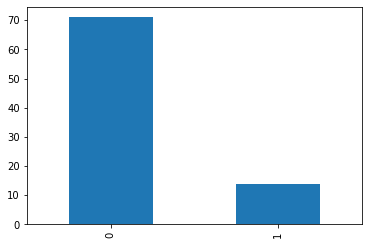

In [35]:
df.peanutyalmondy.value_counts().plot.bar()

By now, you have guessed that we took the feature peanuty/almondy for a reason. The group sizes of peanuty/almondy and not peanuty/almondy are very different which can be very important for the statistical method you may use later on.

Let's also visualize our numeric variables. Of course, frequency tables or bar charts are not a good choice anymore. We use histograms and put all our numeric variables in one plot.

<AxesSubplot:>

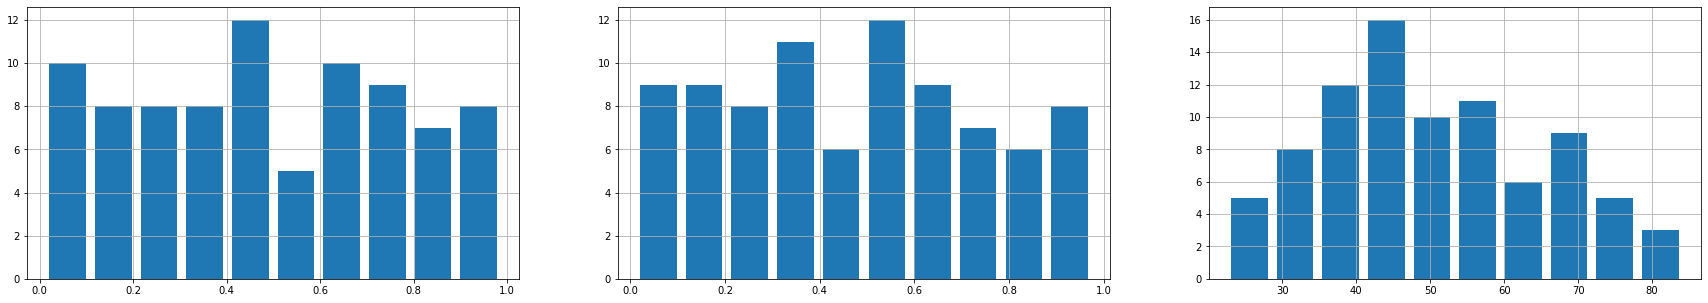

In [36]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(30,5))
df.sugarpercent.hist(ax=axes[0],rwidth=0.8) 
df.pricepercent.hist(ax=axes[1],rwidth=0.8) 
df.winpercent.hist(ax=axes[2],rwidth=0.8) 

### Correlation matrix
Using *pandas* correlation matrix (`corr` function) and coloring it with *seaborn*'s `heatmap` gives a good first overview of our variables and their associations. Remember that winpercent as our popularity feature is the target variable. With this matrix, you can quickly identify variables that are determining popularity quite well, e.g. peanuty/almondy and chocolate seem to enhance popularity while fruity is decreasing it.

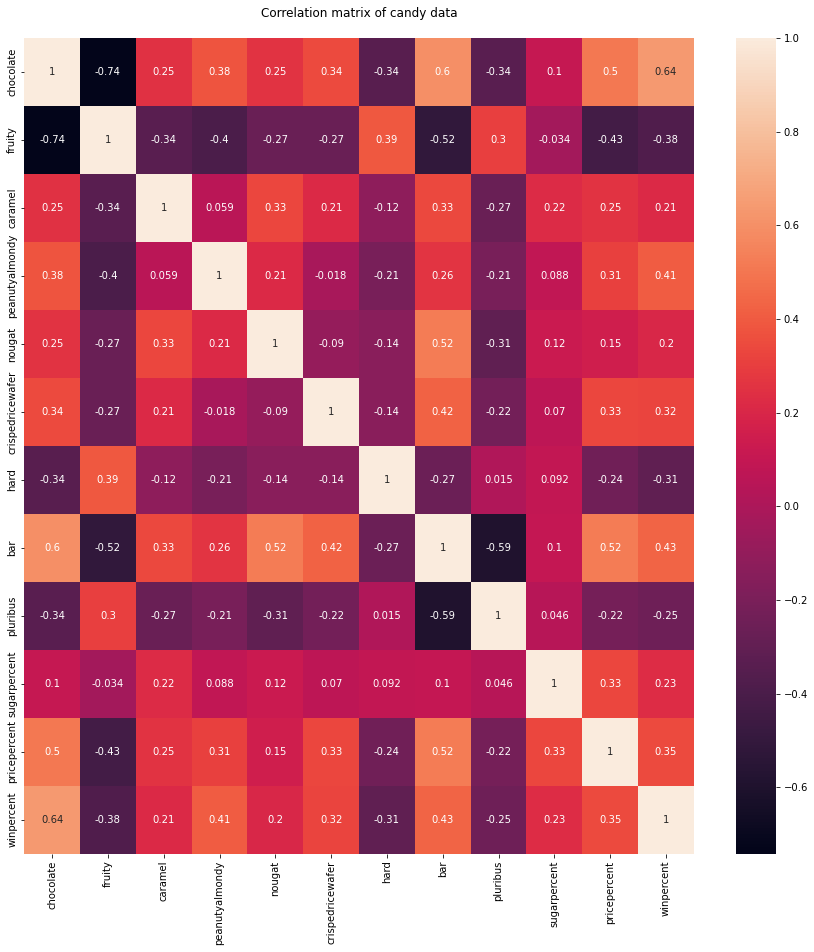

In [37]:
fig, ax = plt.subplots(figsize=(15,15))  
hm = sns.heatmap(df.corr(), annot = True, ax=ax)
hm.set(title = "Correlation matrix of candy data\n")
plt.show()

## Data preprocessing
Data preprocessing is an important step in every data analysis. In the best case, you look through your data in the preprocessing process and find no issues. In almost any case, especially when working with real-world dataset which aren't coming from kaggle or a student GitHub account, you will find something and need to take action.

Preprocessing is usually handled very individually per dataset. A feature (e.g., column, variable) in a data may have a wrong format, for instance, numbers are stored as strings. You could also find outliers that are not plausible such as a person's height of 32.13 meters. 

Data exploration is not only good for getting to know your data better, it also helps you to find issues for the preprocessing. As you can imagine, there is not the one correct order of exploring and preprocessing your data. It is a cyclical process where you look at your data, find an issue, handle it, and look at your data again.

The following steps are common preprocessing steps:
- **Data quality assessment**
    - Outlier analysis
    - Data type analysis
    - Data scale analysis
- **Data cleaning**
    - Handling missing data
    - Handling noisy data
- **Data transformation**
    - Aggregation
    - Normalization
    - Feature selection
    - Discreditization
- **Data reduction**
    - Attribute selection
    - Dimensionality reduction

With our data, we focus on data scales and missing data.

### Data scale analysis
Looking at the percentage features in our dataset, we quickly notice that *sugarpercent* and *pricepercent* are between 0 and 1, and *winpercent* ist between 0 and 100. Although the difference wouldn't do any harm in our analyses, let's bring them on an equal scale.

In [38]:
df.winpercent/100

0     0.669717
1     0.676029
2     0.322611
3     0.461165
4     0.523415
        ...   
80    0.454663
81    0.390119
82    0.443755
83    0.419043
84    0.495241
Name: winpercent, Length: 85, dtype: float64

### Missing data analysis
Missing data analysis is a common phenomenon, which unfortunately you won't observe very often in student datasets made for learning. This is why we simulate 5 missing data points in the candy dataset in the column *sugarpercent*. Let's import the incomplete dataset.

In [39]:
data_miss_url = "https://raw.githubusercontent.com/miosga2309/python_fasttrack/master/candy-data-missing-sugarpercent.csv"
df_miss = pd.read_csv(data_miss_url)
df_miss = df_miss.replace(df_miss.sugarpercent.isna(),np.nan)

How do we find out if we have missing data? Is our missing data clearly marked or could it be zeroes. In the latter case, we could easily miss that some zero is actually missing data. Lucky for us, the missing data points in our csv-file are empty and *pandas* recognizes it as NaNs.

We can use different methods for finding out where we have missing data, how many are missing and which rows have those (e.g., `descibe` or `isna` / `sum`).

In [40]:
df_miss.describe()[0:1] # display only the first row where non-missing data is counted per column

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,80.0,85.0,85.0


In [41]:
pd.DataFrame(df_miss.isna().sum()).transpose() # give back the sums of missing data points per column

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,0,0,0,0,0,0,0,0,0,0,5,0,0


In [42]:
df_miss.sugarpercent.isna()[df_miss.sugarpercent.isna() == True] # find out which indices the missing values have 

4     True
23    True
24    True
67    True
79    True
Name: sugarpercent, dtype: bool

In [43]:
misses = [4,23,24,67,79] # let's store it for later

#### Handling missing data
There are several ways how to handle incomplete observations. We won't cover every possibility but look into two options.

##### Deleting incomplete observations
The simplest way is to just delete observations with missing data. We need to be careful doing that because of two reasons.

1. We could have datasets where almost all observations have missing data points where we would end up removing large parts of our data.
2. Missing data can occur randomly or systematically. If data is missing systematically, we would introduce bias (e.g., temperatures below -10°C are not recorded)

We use *pandas*' `dropna` and then `describe` to observe how the dataframe has changed.

In [44]:
df_miss.dropna().describe()[0:1]

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0


##### Univariate imputation
[Univariate imputation](https://scikit-learn.org/stable/modules/impute.html#univariate-feature-imputation) imputes values in the i-th feature dimension using only non-missing values in that feature dimension (e.g., sugarpercent).

###### Mean imputation
Mean imputation is the process of replacing missing values by the mean of the remaining values within a feature. For that, we use *sklearn*'s `SimpleImputer`.

In [45]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(np.array(df_miss.sugarpercent).reshape(-1,1))
new_sugarpercent_mean = imp.transform(np.array(df_miss.sugarpercent).reshape(-1,1))

Let's see how the mean imputation worked out.

In [46]:
new_sugarpercent_mean[misses] # indeces of the missing data points

array([[0.47879999],
       [0.47879999],
       [0.47879999],
       [0.47879999],
       [0.47879999]])

The mean of all non-missing values is around 0.48.

##### Multivariate imputation
By contrast, [multivariate imputation](https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation) algorithms use the entire set of available feature dimensions to estimate the missing values.

###### kNN imputation
kNN (k nearest neighbour) imputation provides values for missing data points based on a distance metric that is used to find the nearest neighbors. The missing value will be replaced by the value of the average of the k (2 in our case) nearest neighbourd that have values in the particular feature. The default distance metric is the Euclidean distance. Depending on the use case other distances might be more useful (e.g., Manhatten distance).

In [47]:
imp_knn = KNNImputer(n_neighbors=2, weights="uniform")
imp_knn.fit(np.array(df_miss.drop('competitorname', axis=1)))
new_df_knn = imp_knn.transform(np.array(df_miss.drop('competitorname', axis=1)))

In [48]:
new_df_knn[misses,9]

array([0.366     , 0.83649999, 0.40049999, 0.366     , 0.37700002])

The average of the k (2 in our case) nearest neighbours of our observations that have non-missing values in *sugarpercent* gave back the following values.

Data imputations is a form of prediction and this can get very complex. We could apply iterative imputation techniques such as MICE (Multivariate Imputation by Chained Equation) or a neural network. This goes beyond the scope of this course but should emphasize the possibilities data scientists and engineers have.

## Inference from data
As of now, we havedone descriptive statistics, i.e. describing the data with values and visuals. In the next steps, we want to draw conclusions from our data for the future, which means in our case to predict the popularity of new candy. This is by the way machine learning. It doesn't always have to deep neural networks ;)

### Training a model
The ordinary least squares (OLS) regression fits a linear model with coefficients w = (w<sub>1</sub>, …, w<sub>p</sub>) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

In [55]:
est = sm.OLS(df.winpercent, df.drop(['competitorname','winpercent'], axis=1)) # target variable, explanatory variables
fit = est.fit()
print(fit.summary())

                                 OLS Regression Results                                
Dep. Variable:             winpercent   R-squared (uncentered):                   0.933
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              93.39
Date:                Wed, 01 Dec 2021   Prob (F-statistic):                    9.05e-39
Time:                        14:56:35   Log-Likelihood:                         -342.36
No. Observations:                  85   AIC:                                      706.7
Df Residuals:                      74   BIC:                                      733.6
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

Now we have trained a OLS regression model. The overview above gives information about the total variance explained of the model adjusted for the sample size (adj. R<sup>2</sup> = 92.3%) or statistically significant variables at an alpha level of 0.05 (e.g., *chocolate, fruity, peanutyalmondy* and *pluribus*). We can also see that *pricepercent* is not statistically significant. This may lay in the experiment's design because people had to choose which candy of random pairs they prefer without having to buy them.

### Testing the model

In [50]:
# ideen
## quiz über day2 (was macht describe() oder df.var[-1] usw.)
## windows forms für quiz
## test data set für day 2 macht kerim